In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import scipy.stats as sci
from sklearn.metrics import accuracy_score

In [3]:
pokemon = pd.read_csv('ML_PokeData.csv')
combats = pd.read_csv('combats.csv')

In [4]:
cols = ["First_pokemon","Second_pokemon","Winner"]
new_combat_data=combats[cols].replace(pokemon.name)
new_combat_data.head()

,First_pokemon,Second_pokemon,Winner
0,Beautifly,Nosepass,Nosepass
1,Carbink,Dedenne,Dedenne
2,Sunflora,Flabébé,Flabébé
3,Smoochum,Swirlix,Swirlix
4,Chikorita,Donphan,Chikorita


In [6]:
combats.Winner[combats.Winner == combats.First_pokemon] = 0
combats.Winner[combats.Winner == combats.Second_pokemon] = 1
combats.head(10)

,First_pokemon,Second_pokemon,Winner
0,266,298,1
1,702,701,1
2,191,668,1
3,237,683,1
4,151,231,0
5,657,752,0
6,192,134,1
7,73,545,1
8,220,763,1
9,302,31,1


In [7]:
pokemon.head(10)

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,Ability__Intimidate,Ability__Keen Eye,Ability__Levitate,Ability__Other,Ability__Overgrow,Ability__Pressure,Ability__Sturdy,Ability__Swarm,Ability__Swift Swim,Ability__Torrent
0,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,0,0,0,0,1,0,0,0,0,0
1,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,0,0,0,0,1,0,0,0,0,0
2,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,0,0,0,0,1,0,0,0,0,0
3,0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,0,0,0,0,0,0,0,0,0,0
4,0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,0,0,0,0,0,0,0,0,0,0
5,0.25,1.0,1.0,2.0,0.5,0.5,0.5,1.0,1.0,0.25,...,0,0,0,0,0,0,0,0,0,0
6,1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.00,...,0,0,0,0,0,0,0,0,0,1
7,1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.00,...,0,0,0,0,0,0,0,0,0,1
8,1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.00,...,0,0,0,0,0,0,0,0,0,1
9,1.00,1.0,1.0,1.0,1.0,0.5,2.0,2.0,1.0,0.50,...,0,0,0,1,0,0,0,0,0,0


In [8]:
df = pd.merge(combats,pokemon,left_on='First_pokemon',right_on='pokedex_number')
df = pd.merge(df,pokemon,left_on='Second_pokemon',right_on='pokedex_number',suffixes=['_1','_2'])
df.head(10)

,First_pokemon,Second_pokemon,Winner,against_bug_1,against_dark_1,against_dragon_1,against_electric_1,against_fairy_1,against_fight_1,against_fire_1,...,Ability__Intimidate_2,Ability__Keen Eye_2,Ability__Levitate_2,Ability__Other_2,Ability__Overgrow_2,Ability__Pressure_2,Ability__Sturdy_2,Ability__Swarm_2,Ability__Swift Swim_2,Ability__Torrent_2
0,266,298,1,1.00,1.0,1.0,1.0,1.0,0.5,2.0,...,0,0,0,1,0,0,0,0,0,0
1,73,298,1,0.50,1.0,1.0,2.0,0.5,0.5,0.5,...,0,0,0,1,0,0,0,0,0,0
2,373,298,1,0.50,1.0,2.0,1.0,2.0,0.5,0.5,...,0,0,0,1,0,0,0,0,0,0
3,536,298,0,1.00,1.0,1.0,0.0,1.0,1.0,0.5,...,0,0,0,1,0,0,0,0,0,0
4,368,298,0,1.00,1.0,1.0,2.0,1.0,1.0,0.5,...,0,0,0,1,0,0,0,0,0,0
5,659,298,1,1.00,1.0,1.0,1.0,1.0,2.0,1.0,...,0,0,0,1,0,0,0,0,0,0
6,736,298,0,1.00,1.0,1.0,1.0,1.0,0.5,2.0,...,0,0,0,1,0,0,0,0,0,0
7,638,298,0,0.25,0.5,0.5,1.0,1.0,2.0,2.0,...,0,0,0,1,0,0,0,0,0,0
8,129,298,0,1.00,1.0,1.0,2.0,1.0,1.0,0.5,...,0,0,0,1,0,0,0,0,0,0
9,517,298,1,2.00,2.0,1.0,1.0,1.0,0.5,1.0,...,0,0,0,1,0,0,0,0,0,0


In [11]:
for x in sorted(df.columns):
    print(x)

Abilities_Counts_1
Abilities_Counts_2
Ability__Blaze_1
Ability__Blaze_2
Ability__Chlorophyll_1
Ability__Chlorophyll_2
Ability__Intimidate_1
Ability__Intimidate_2
Ability__Keen Eye_1
Ability__Keen Eye_2
Ability__Levitate_1
Ability__Levitate_2
Ability__Other_1
Ability__Other_2
Ability__Overgrow_1
Ability__Overgrow_2
Ability__Pressure_1
Ability__Pressure_2
Ability__Sturdy_1
Ability__Sturdy_2
Ability__Swarm_1
Ability__Swarm_2
Ability__Swift Swim_1
Ability__Swift Swim_2
Ability__Torrent_1
Ability__Torrent_2
First_pokemon
Second_pokemon
Type1_bug_1
Type1_bug_2
Type1_dark_1
Type1_dark_2
Type1_dragon_1
Type1_dragon_2
Type1_electric_1
Type1_electric_2
Type1_fairy_1
Type1_fairy_2
Type1_fighting_1
Type1_fighting_2
Type1_fire_1
Type1_fire_2
Type1_flying_1
Type1_flying_2
Type1_ghost_1
Type1_ghost_2
Type1_grass_1
Type1_grass_2
Type1_ground_1
Type1_ground_2
Type1_ice_1
Type1_ice_2
Type1_normal_1
Type1_normal_2
Type1_poison_1
Type1_poison_2
Type1_psychic_1
Type1_psychic_2
Type1_rock_1
Type1_rock_2
Typ

In [12]:
cols = ['First_pokemon','Second_pokemon','name_1','name_2','pokedex_number_1','pokedex_number_2']
df_sub = df.drop(columns=cols)
df_sub.shape

(50000, 161)

In [14]:
def doMLClassification(model, X_train, y_train, X_test, y_test):
    # fit the model
    model.fit(X_train, y_train)

    # predict the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    test_proba = model.predict_proba(X_test)[:,1]

    # make some pretty graphs
    print("TRAINING SET METRICS")
    print(confusion_matrix(y_train, train_preds))
    print(classification_report(y_train, train_preds))
    print()
    print("TESTING SET METRICS")
    print(confusion_matrix(y_test, test_preds))
    print(classification_report(y_test, test_preds))

    # ROC Curve
    auc = roc_auc_score(y_test, test_proba)
    fpr, tpr, thresholds = roc_curve(y_test, test_proba)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(F"AUC: {auc}")
    plt.show()

In [15]:
x_label=df_sub.drop("Winner",axis=1)
y_label=df_sub["Winner"]

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x_label, y_label, test_size=0.20, random_state=42)

TRAINING SET METRICS
[[  573 18274]
 [  585 20568]]
              precision    recall  f1-score   support

           0       0.49      0.03      0.06     18847
           1       0.53      0.97      0.69     21153

    accuracy                           0.53     40000
   macro avg       0.51      0.50      0.37     40000
weighted avg       0.51      0.53      0.39     40000


TESTING SET METRICS
[[ 137 4675]
 [ 133 5055]]
              precision    recall  f1-score   support

           0       0.51      0.03      0.05      4812
           1       0.52      0.97      0.68      5188

    accuracy                           0.52     10000
   macro avg       0.51      0.50      0.37     10000
weighted avg       0.51      0.52      0.38     10000



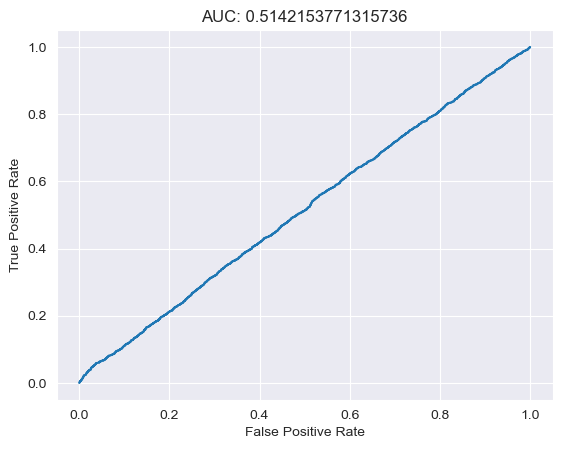

In [18]:
lr = LogisticRegression()
doMLClassification(lr, x_train, y_train, x_test, y_test)

TRAINING SET METRICS
[[18846     1]
 [    0 21153]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18847
           1       1.00      1.00      1.00     21153

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000


TESTING SET METRICS
[[3679 1133]
 [ 922 4266]]
              precision    recall  f1-score   support

           0       0.80      0.76      0.78      4812
           1       0.79      0.82      0.81      5188

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



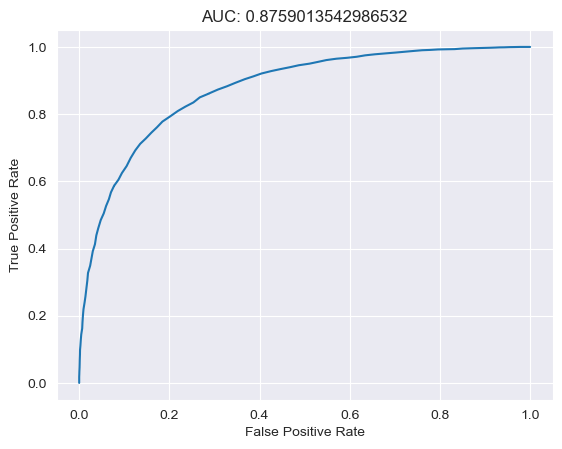

In [19]:
clf = RandomForestClassifier(n_estimators=100)
doMLClassification(clf, x_train, y_train, x_test, y_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 21153, number of negative: 18847
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004716 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2176
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 160
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.528825 -> initscore=0.115428
[LightGBM] [Info] Start training from score 0.115428
TRAINING SET METRICS
[[15337  3510]
 [ 2595 18558]]
              precision    recall  f1-score   support

           0       0.86      0.81      0.83     18847
           1       0.84      0.88      0.86     21153

    accuracy                           0.85     40000
   macro avg       0.85      0.85      0.85     40000
weighted avg       0.85      0.85      0.85     40000


TESTING SET METRICS
[[3794 1018]
 [ 732 4456

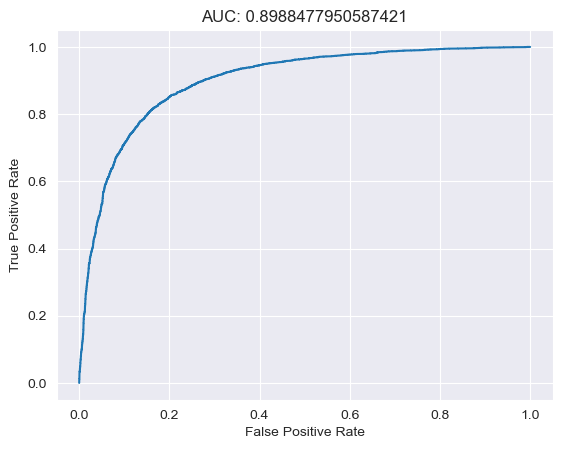

In [20]:
lgb = LGBMClassifier(random_state=42, n_estimators=100)
doMLClassification(lgb, x_train, y_train, x_test, y_test)

In [23]:
sorted(list(zip(lgb.feature_importances_, x_label.columns)), reverse=True)

[(124, 'defense_1'),
 (123, 'base_total_1'),
 (121, 'attack_1'),
 (120, 'speed_2'),
 (119, 'sp_attack_2'),
 (118, 'speed_1'),
 (116, 'sp_defense_2'),
 (116, 'sp_attack_1'),
 (115, 'defense_2'),
 (111, 'sp_defense_1'),
 (108, 'hp_1'),
 (108, 'attack_2'),
 (100, 'base_total_2'),
 (88, 'hp_2'),
 (77, 'generation_1'),
 (66, 'generation_2'),
 (54, 'base_egg_steps_2'),
 (48, 'base_egg_steps_1'),
 (37, 'experience_growth_2'),
 (33, 'experience_growth_1'),
 (33, 'against_bug_2'),
 (32, 'Abilities_Counts_2'),
 (30, 'against_ice_2'),
 (29, 'Abilities_Counts_1'),
 (28, 'against_rock_2'),
 (26, 'against_fight_1'),
 (26, 'against_electric_2'),
 (25, 'against_rock_1'),
 (25, 'against_ice_1'),
 (24, 'against_poison_1'),
 (24, 'against_dark_1'),
 (23, 'against_grass_2'),
 (22, 'against_bug_1'),
 (21, 'against_electric_1'),
 (20, 'base_happiness_2'),
 (20, 'base_happiness_1'),
 (20, 'against_water_1'),
 (20, 'against_dragon_2'),
 (19, 'against_fight_2'),
 (18, 'against_grass_1'),
 (18, 'against_fire_2'

TRAINING SET METRICS
[[16579  2268]
 [ 1875 19278]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89     18847
           1       0.89      0.91      0.90     21153

    accuracy                           0.90     40000
   macro avg       0.90      0.90      0.90     40000
weighted avg       0.90      0.90      0.90     40000


TESTING SET METRICS
[[3910  902]
 [ 773 4415]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4812
           1       0.83      0.85      0.84      5188

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



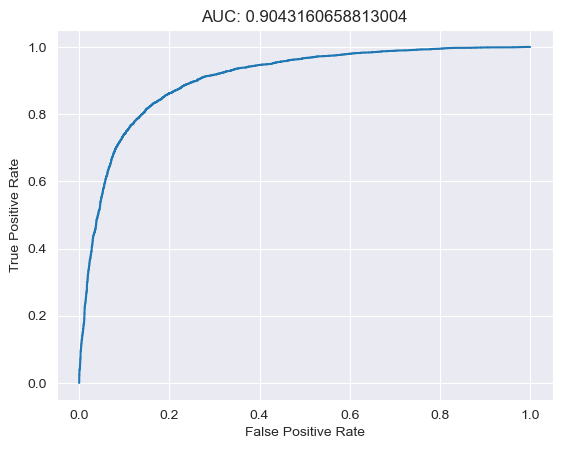

In [24]:
xgb = XGBClassifier(random_state=42, n_estimators=100)
doMLClassification(xgb, x_train, y_train, x_test, y_test)

In [25]:
sorted(list(zip(xgb.feature_importances_, x_label.columns)), reverse=True)

[(0.020346032, 'Type1_dragon_1'),
 (0.018648196, 'Type1_steel_1'),
 (0.018270364, 'Ability__Sturdy_2'),
 (0.01681608, 'Type1_ghost_2'),
 (0.015132387, 'Type2_dark_1'),
 (0.014759607, 'Type2_normal_1'),
 (0.014504148, 'Type2_steel_1'),
 (0.014146924, 'Ability__Sturdy_1'),
 (0.01400642, 'Type2_electric_2'),
 (0.0139314355, 'Type2_grass_1'),
 (0.013045832, 'Type1_ground_1'),
 (0.012443894, 'against_flying_2'),
 (0.011702518, 'Type1_steel_2'),
 (0.011311337, 'Type2_fighting_2'),
 (0.011218858, 'Type1_fairy_2'),
 (0.010879079, 'Type1_dark_2'),
 (0.010606946, 'Ability__Torrent_2'),
 (0.010562713, 'Ability__Intimidate_2'),
 (0.010561215, 'Type1_water_1'),
 (0.010536072, 'Type1_ice_2'),
 (0.010288643, 'Type2_normal_2'),
 (0.010275867, 'Type1_fighting_2'),
 (0.010159591, 'base_happiness_1'),
 (0.009964769, 'Ability__Swarm_2'),
 (0.009470117, 'Ability__Keen Eye_2'),
 (0.00929548, 'Type2_steel_2'),
 (0.009147668, 'Type1_rock_1'),
 (0.009026117, 'Type1_grass_1'),
 (0.009006823, 'Type2_fighting_1')